<a href="https://colab.research.google.com/github/Tagore-7/Neural_Networks_AK/blob/main/Makemore_RNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import torch
import torch.nn.functional as F
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
### read all the words(names)
words = open('names.txt', 'r').read().splitlines()
words[:8]

['emma', 'olivia', 'ava', 'isabella', 'sophia', 'charlotte', 'mia', 'amelia']

In [3]:
len(words)

32033

In [4]:
chars = sorted(list(set("".join(words))))
stoi = {s: i+1 for i, s in enumerate(chars)}
stoi['.'] = 0
itos = {i:s for s,i in stoi.items()}
vocab_size = len(itos)

In [5]:
## training split , dev/ validation split , test split
# 80 %, 10 %, 10 %

In [6]:
### building the dataset
block_size = 3 ### context length = how many characters are we taking to predict the next one

def build_dataset(words):
  X, Y = [],[]
  for w in words:
    context = [0] * block_size
    for ch in w +".":
      ix = stoi[ch]
      X.append(context)
      Y.append(ix)
      context = context[1:] + [ix]

  X = torch.tensor(X)
  Y = torch.tensor(Y)
  print(X.shape, Y.shape)
  return X, Y

import random
random.seed(42)
n1 = int(0.8 * len(words))
n2 = int(0.9 * (len(words)))

Xtr, Ytr = build_dataset(words[:n1])
Xdev, Ydev = build_dataset(words[n1:n2])
Xte, Yte = build_dataset(words[n2:])




torch.Size([182778, 3]) torch.Size([182778])
torch.Size([22633, 3]) torch.Size([22633])
torch.Size([22735, 3]) torch.Size([22735])


In [7]:
n_embd = 10
n_hidden = 200

g = torch.Generator().manual_seed(2147483647)
C = torch.randn((vocab_size,n_embd), generator=g)
W1 = torch.randn((n_embd * block_size, n_hidden), generator= g) * 0.1
b1 = torch.randn((n_hidden), generator=g) * 0.01
W2 = torch.randn((n_hidden, vocab_size), generator = g) * 0.1
b2 = torch.randn(vocab_size, generator = g) * 0.1
parameters = [C, W1, b1, W2, b2]

In [8]:
for p in parameters:
  p.requires_grad = True

In [9]:
lri = []
stepi= []

max_steps = 200000
lossi = []
batch_size = 32


for i in range(max_steps):
  ## mini batch
  ix = torch.randint(0, Xtr.shape[0],(batch_size,), generator=g)
  Xb, Yb = Xtr[ix], Ytr[ix]

  ## forward pass
  emb = C[Xb] # (32,3,2)
  embcat = emb.view(emb.shape[0], -1)
  hpreact = embcat @ W1 + b1
  h = torch.tanh(hpreact)
  logits = h @ W2 + b2 # (32,27)
  loss = F.cross_entropy(logits, Yb)

  # print(loss.item())
  ## backward pass
  for p in parameters:
    p.grad = None
  loss.backward()

  # # learning rate update
  # lr = lrs[i]

  # update
  lr = 0.1 if i < 100000 else 0.01
  for p in parameters:
    p.data += -0.1 * p.grad

  # track status
  # lri.append(lre[i])
  if i  % 10000 == 0:
    print(f'{i:7d}/{max_steps:7d}: {loss.item():.4f}')
  stepi.append(i)
  lossi.append(loss.log10().item())


# print(loss.item())

      0/ 200000: 3.7298
  10000/ 200000: 2.1083
  20000/ 200000: 2.1378
  30000/ 200000: 1.6141
  40000/ 200000: 2.0524
  50000/ 200000: 1.8954
  60000/ 200000: 2.4944
  70000/ 200000: 2.2493
  80000/ 200000: 1.9371
  90000/ 200000: 2.3135
 100000/ 200000: 2.0504
 110000/ 200000: 1.8670
 120000/ 200000: 1.9080
 130000/ 200000: 2.0634
 140000/ 200000: 2.0914
 150000/ 200000: 2.4734
 160000/ 200000: 2.0006
 170000/ 200000: 2.2347
 180000/ 200000: 2.1113
 190000/ 200000: 1.7486


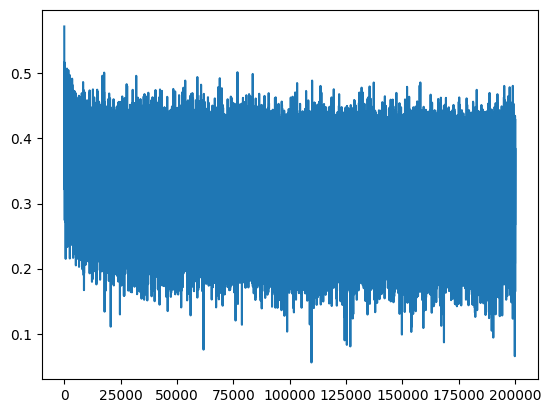

In [10]:
plt.plot(stepi, lossi)

tensor(0.0096) tensor(0.9995)
tensor(0.0027) tensor(3.2299)


(array([6.62954240e-06, 0.00000000e+00, 6.62954240e-06, 0.00000000e+00,
        3.31477120e-05, 6.62954240e-05, 9.94431360e-05, 1.25961306e-04,
        2.38663526e-04, 4.37549799e-04, 8.02174631e-04, 1.21983580e-03,
        2.13471265e-03, 3.79872780e-03, 5.78759052e-03, 9.22169348e-03,
        1.44192547e-02, 2.17183809e-02, 3.19742830e-02, 4.50875179e-02,
        6.23906236e-02, 8.14107807e-02, 1.00424308e-01, 1.18887584e-01,
        1.29183263e-01, 1.32895807e-01, 1.24489547e-01, 1.09639372e-01,
        9.18987168e-02, 7.09957696e-02, 5.33147800e-02, 3.92402615e-02,
        2.65910946e-02, 1.75351397e-02, 1.12834812e-02, 7.08698083e-03,
        4.44179341e-03, 2.77777827e-03, 1.70379240e-03, 1.12039267e-03,
        6.23176986e-04, 3.64624832e-04, 2.18774899e-04, 8.61840512e-05,
        5.96658816e-05, 3.31477120e-05, 6.62954240e-06, 1.98886272e-05,
        0.00000000e+00, 6.62954240e-06]),
 array([-19.04053688, -18.28633701, -17.53213715, -16.77793728,
        -16.02373741, -15.2695

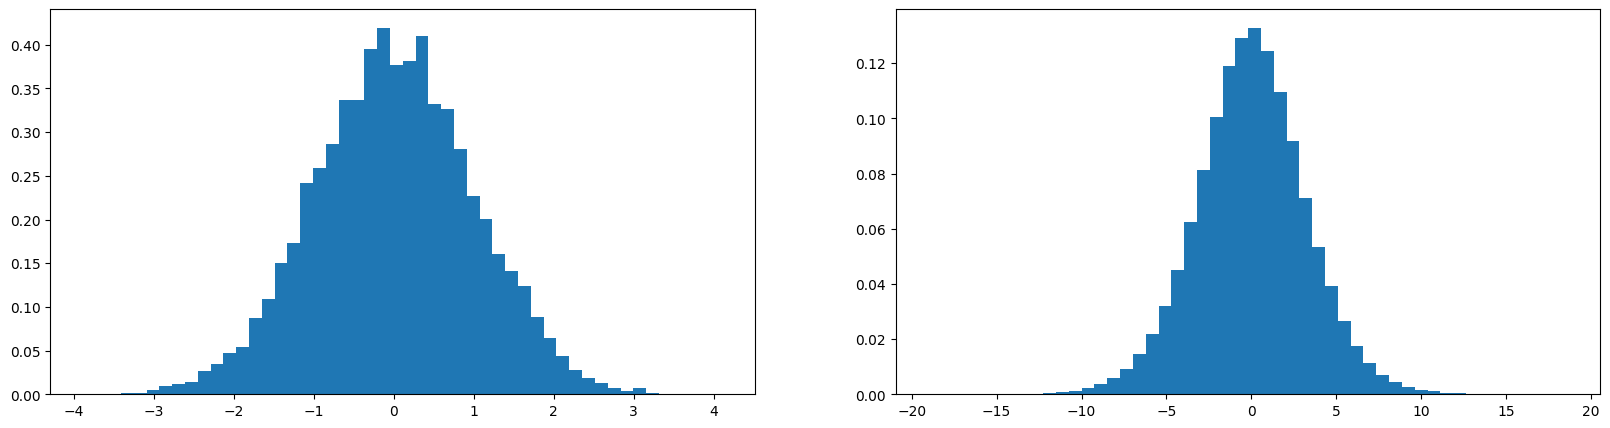

In [11]:
x = torch.randn(1000, 10)  ## 1000 examples 10 features
W = torch.randn(10,200)  ## 10 weights 200 neurons
y = x @ W ## output
print(x.mean(), x.std())
print(y.mean(), y.std())
plt.figure(figsize=(20,5))
plt.subplot(121)
plt.hist(x.view(-1).tolist(), 50, density=True)
plt.subplot(122)
plt.hist(y.view(-1).tolist(), 50, density= True)


tensor(0.0038) tensor(1.0029)
tensor(9.0000e-05) tensor(0.9868)


(array([2.04709232e-05, 6.14127697e-05, 2.04709232e-05, 6.14127697e-05,
        1.63767386e-04, 1.22825539e-04, 4.29889388e-04, 7.16482313e-04,
        1.06448801e-03, 2.31321432e-03, 3.66429526e-03, 6.34598620e-03,
        9.58039207e-03, 1.72774592e-02, 2.77790428e-02, 4.49950892e-02,
        7.03585631e-02, 1.07083399e-01, 1.56254557e-01, 2.18404280e-01,
        2.85139490e-01, 3.51895170e-01, 4.00882090e-01, 4.27965121e-01,
        4.20268054e-01, 3.86900449e-01, 3.23604354e-01, 2.59612248e-01,
        1.91812551e-01, 1.35558454e-01, 8.99287657e-02, 5.76461198e-02,
        3.68681327e-02, 2.40738057e-02, 1.38383441e-02, 9.10956083e-03,
        4.79019603e-03, 3.48005695e-03, 2.00615048e-03, 9.00720622e-04,
        6.55069543e-04, 2.66122002e-04, 6.14127697e-05, 6.14127697e-05,
        6.14127697e-05, 2.04709232e-05, 2.04709232e-05, 2.04709232e-05,
        0.00000000e+00, 2.04709232e-05]),
 array([-5.81372929, -5.56948041, -5.32523153, -5.08098266, -4.83673378,
        -4.5924849 , 

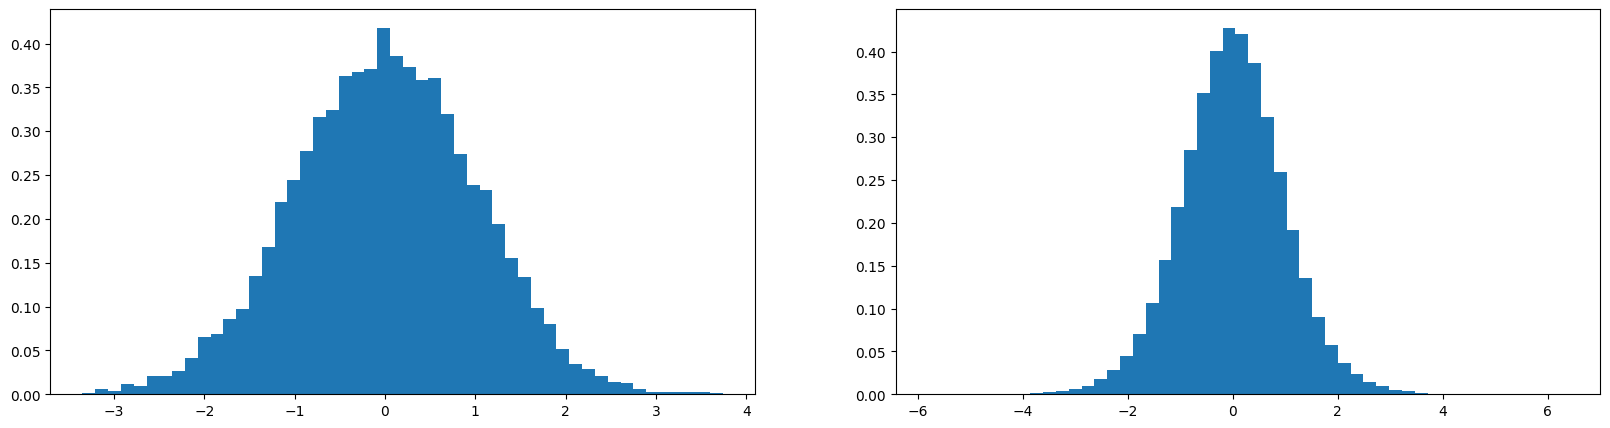

In [12]:
x = torch.randn(1000, 10)
W = torch.randn(10,200) / 10**0.5
y = x @ W ## output
print(x.mean(), x.std())
print(y.mean(), y.std())
plt.figure(figsize=(20,5))
plt.subplot(121)
plt.hist(x.view(-1).tolist(), 50, density=True)
plt.subplot(122)
plt.hist(y.view(-1).tolist(), 50, density= True)


      0/ 200000: 4.0946
  10000/ 200000: 2.1303
  20000/ 200000: 2.0264
  30000/ 200000: 1.7888
  40000/ 200000: 2.0505
  50000/ 200000: 1.9825
  60000/ 200000: 2.4940
  70000/ 200000: 2.2999
  80000/ 200000: 1.8688
  90000/ 200000: 2.2773
 100000/ 200000: 2.1847
 110000/ 200000: 1.9730
 120000/ 200000: 1.9745
 130000/ 200000: 2.0439
 140000/ 200000: 2.1216
 150000/ 200000: 2.3906
 160000/ 200000: 2.0353
 170000/ 200000: 2.2783
 180000/ 200000: 2.1376
 190000/ 200000: 1.7453


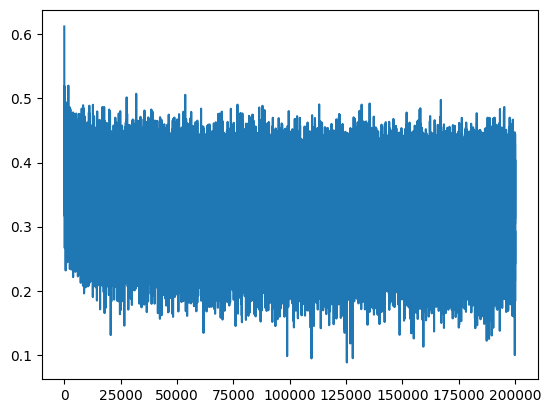

In [13]:
n_embd = 10
n_hidden = 200

g = torch.Generator().manual_seed(2147483647)
C = torch.randn((vocab_size,n_embd), generator=g)
W1 = torch.randn((n_embd * block_size, n_hidden), generator= g) *  (5/3) / ((n_embd * block_size) ** 0.5 ) #0.1
b1 = torch.randn((n_hidden), generator=g) * 0.01
W2 = torch.randn((n_hidden, vocab_size), generator = g) * 0.1
b2 = torch.randn(vocab_size, generator = g) * 0.1

bngain = torch.ones((1, n_hidden))
bnbias = torch.zeros((1, n_hidden))

bnmean_running = torch.zeros((1, n_hidden))
bnstd_running = torch.zeros((1, n_hidden))

parameters = [C, W1, b1, W2, b2, bngain, bnbias]

for p in parameters:
  p.requires_grad = True

lri = []
stepi= []

max_steps = 200000
lossi = []
batch_size = 32


for i in range(max_steps):
  ## mini batch
  ix = torch.randint(0, Xtr.shape[0],(batch_size,), generator=g)
  Xb, Yb = Xtr[ix], Ytr[ix]

  ## forward pass
  emb = C[Xb] # (32,3,2)
  embcat = emb.view(emb.shape[0], -1)
  hpreact = embcat @ W1 + b1
  bnmeani = hpreact.mean(0, keepdim= True)
  bnstdi = hpreact.std(0, keepdim = True)
  hpreact = bngain * (hpreact - bnmeani) / bnstdi  + bnbias

  with torch.no_grad():
    bnmean_running = 0.999 * bnmean_running + 0.001 * bnmeani
    bnstd_running = 0.999 * bnstd_running + 0.001 * bnstdi

  h = torch.tanh(hpreact)
  logits = h @ W2 + b2 # (32,27)
  loss = F.cross_entropy(logits, Yb)



  # print(loss.item())
  ## backward pass
  for p in parameters:
    p.grad = None
  loss.backward()

  # # learning rate update
  # lr = lrs[i]

  # update
  lr = 0.1 if i < 100000 else 0.01
  for p in parameters:
    p.data += -0.1 * p.grad

  # track status
  # lri.append(lre[i])
  if i  % 10000 == 0:
    print(f'{i:7d}/{max_steps:7d}: {loss.item():.4f}')
  stepi.append(i)
  lossi.append(loss.log10().item())


# print(loss.item())
plt.plot(stepi, lossi)

In [14]:
# calibrate the btach norm at the end of training

with torch.no_grad():
  # pass the training set through
  emb = C[Xtr]
  embcat = emb.view(emb.shape[0], -1)
  hpreact = embcat @ W1 + b1
  # measure the mean / std over the entire training set
  bnmean = hpreact.mean(0, keepdim=True)
  bnstd = hpreact.std(0, keepdim=True)

In [15]:
@torch.no_grad() # decorator for disabiling gradient tracking

def split_loss(split):
  x, y = {
      'train': (Xtr, Ytr),
      'val' : (Xdev, Ydev),
      'test' : (Xte, Yte),
  }[split]
  emb = C[x] # (32,3,2)
  embcat = emb.view(emb.shape[0], -1)
  hpreact = embcat @ W1 + b1
  hpreact = bngain * (hpreact - bnmean) / bnstd + bnbias
  h = torch.tanh(hpreact)
  logits = h @ W2 + b2 # (32,27)
  loss = F.cross_entropy(logits, y)
  print(split, loss.item())

split_loss('train')
split_loss('val')

train 2.0874762535095215
val 2.4019179344177246


In [16]:
class Linear:

  def __init__(self, fan_in, fan_out, bias = True):
    self.weight = torch.randn((fan_in, fan_out), generator = g) / fan_in ** 0.5
    self.bias = torch.randn(fan_out) if bias else None

  def __call__(self, x):
    self.out = x @ self.weight
    if self.bias is not None:
      self.out += self.bias
    return self.out

  def parameters(self):
    return [self.weight] + ([] if self.bias is None else [self.bias])

class BatchNorm1d:

  def __init__(self, dim, eps = 1e-5, momentum = 0.1):
    self.eps = eps
    self.momentum = momentum
    self.training = True
    self.gamma = torch.ones(dim)
    self.beta = torch.zeros(dim)
    self.running_mean = torch.zeros(dim)
    self.running_var = torch.ones(dim)

  def __call__(self, x):
    if self.training:
      xmean = x.mean(0, keepdim=True)
      xvar = x.std(0, keepdim = True)
    else:
      xmean = self.running_mean
      xvar = self.running_var
    xhat = (x - xmean) / torch.sqrt(xvar + self.eps)
    self.out = self.gamma * xhat + self.beta
    if self.training:
      with torch.no_grad():
        self.running_mean = (1- self.momentum) * (self.running_mean) + self.momentum * xmean
        self.running_var = (1 - self.momentum) * (self.running_var) + self.momentum * xvar
    return self.out

  def parameters(self):
    return [self.gamma, self.beta]

class Tanh:
  def __call__(self, x):
    self.out = torch.tanh(x)
    return self.out
  def parameters(self):
    return []

n_embd = 10
n_hidden = 100
g = torch.Generator().manual_seed(2147483647)

vocab_size = 27
block_size = 3


C = torch.randn((vocab_size, n_embd))
layers = [
    Linear(n_embd * block_size, n_hidden), BatchNorm1d(n_hidden) , Tanh(),
    Linear(n_hidden,n_hidden), BatchNorm1d(n_hidden) ,Tanh(),
    Linear(n_hidden,n_hidden), BatchNorm1d(n_hidden) ,Tanh(),
    Linear(n_hidden,n_hidden), BatchNorm1d(n_hidden) ,Tanh(),
    Linear(n_hidden,n_hidden), BatchNorm1d(n_hidden) ,Tanh(),
    Linear(n_hidden,vocab_size), BatchNorm1d(vocab_size) ,
]

with torch.no_grad():
  layers[-1].gamma *= 0.1
  for layer in layers[:-1]:
    if isinstance(layer, Linear):
      layer.weight *= 5/3

parameters = [C] + [p for layer in layers for p in layer.parameters()]
print(sum(p.nelement() for p in parameters))
for p in parameters:
  p.requires_grad = True

46497


In [17]:
max_steps = 20000
batch_size = 32
lossi = []
ud = []

for i in range(max_steps):

  ix = torch.randint(0, Xtr.shape[0], (batch_size,), generator =g)
  Xb, Yb = Xtr[ix], Ytr[ix]

  emb = C[Xb]
  x = emb.view(emb.shape[0], -1)
  for layer in layers:
    x = layer(x)
  loss = F.cross_entropy(x, Yb)

  for layer in layers:
    layer.out.retain_grad()
  for p in parameters:
    p.grad= None
  loss.backward()

  lr = 0.1 if i < 100000 else 0.01
  for p in parameters:
    p.data += -lr  * p.grad

  if i % 10000 == 0:
    print(f"{i:7d}/{max_steps:7d}: {loss.item():.4f}")
  lossi.append(loss.log10().item())

  with torch.no_grad():
    ud.append([((lr * p.grad).std() / p.data.std()).log10().item() for p in parameters])

      0/  20000: 3.7165
  10000/  20000: 2.0492


layer 1 (      Tanh): mean +0.02, std 0.84, saturated: 38.41
layer 3 (      Tanh): mean +0.01, std 0.82, saturated: 33.75
layer 5 (      Tanh): mean +0.04, std 0.83, saturated: 34.91
layer 7 (      Tanh): mean +0.00, std 0.85, saturated: 37.53
layer 9 (      Tanh): mean +0.06, std 0.80, saturated: 26.97


Text(0.5, 1.0, 'activation distribution')

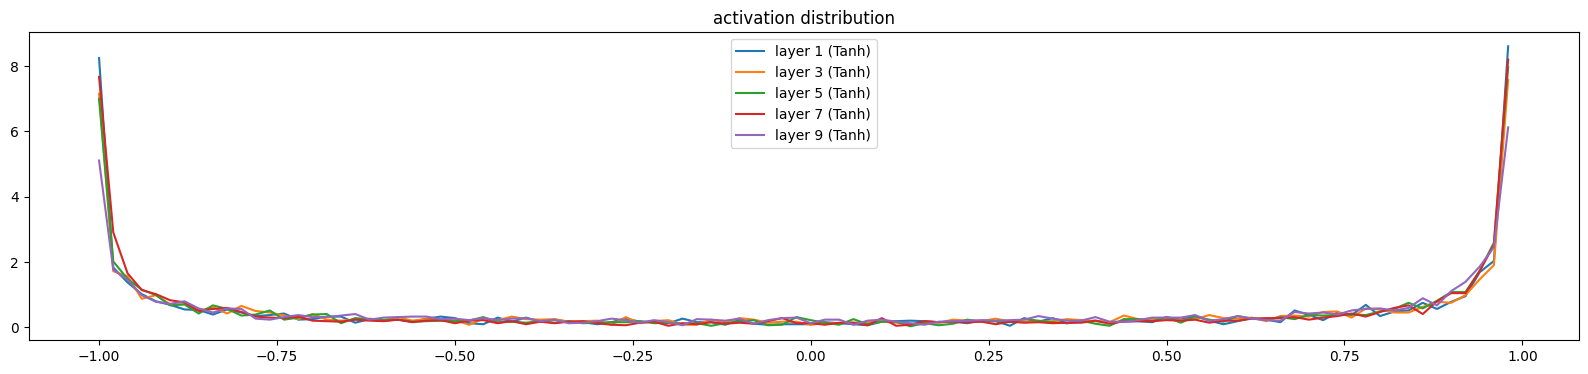

In [18]:
plt.figure(figsize = (20,4))
legends = []
for i, layer in enumerate(layers[:-1]):
  if isinstance(layer, Tanh):
    t = layer.out
    print('layer %d (%10s): mean %+.2f, std %.2f, saturated: %.2f' % (i, layer.__class__.__name__, t.mean(), t.std(), (t.abs()> 0.97 ).float().mean()*100))
    hy, hx = torch.histogram(t, density = True)
    plt.plot(hx[:-1].detach(), hy.detach())
    legends.append(f'layer {i} ({layer.__class__.__name__})')
plt.legend(legends);
plt.title('activation distribution')

layer 1 (      Tanh): mean +0.00, std 0.00
layer 3 (      Tanh): mean +0.00, std 0.00
layer 5 (      Tanh): mean +0.00, std 0.00
layer 7 (      Tanh): mean +0.00, std 0.00
layer 9 (      Tanh): mean +0.00, std 0.00


Text(0.5, 1.0, 'gradient distribution')

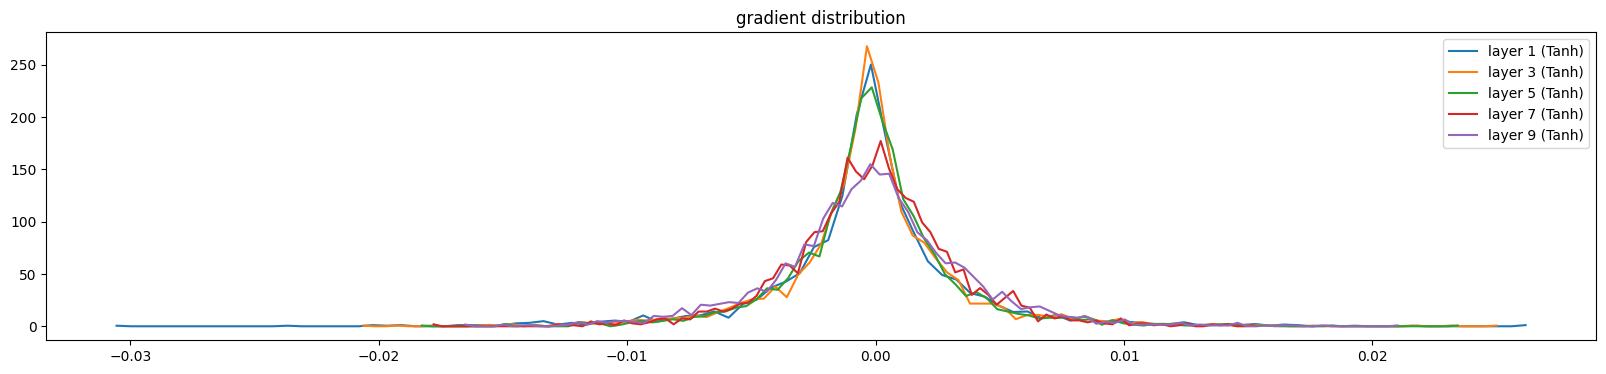

In [19]:
plt.figure(figsize = (20,4))
legends = []
for i, layer in enumerate(layers[:-1]):
  if isinstance(layer, Tanh):
    t = layer.out.grad
    print('layer %d (%10s): mean %+.2f, std %.2f' % (i, layer.__class__.__name__, t.mean(), t.std()))
    hy, hx = torch.histogram(t, density = True)
    plt.plot(hx[:-1].detach(), hy.detach())
    legends.append(f'layer {i} ({layer.__class__.__name__})')
plt.legend(legends);
plt.title('gradient distribution')

weights   (27, 10) | mean +0.000856 | std 1.593695e-02 | grad: data ratio 1.464084e-02
weights  (30, 100) | mean +0.000674 | std 1.293550e-02 | grad: data ratio 3.663924e-02
weights (100, 100) | mean -0.000164 | std 8.881873e-03 | grad: data ratio 4.370412e-02
weights (100, 100) | mean -0.000084 | std 7.349687e-03 | grad: data ratio 3.704230e-02
weights (100, 100) | mean -0.000031 | std 6.994931e-03 | grad: data ratio 3.556515e-02
weights (100, 100) | mean -0.000028 | std 7.507700e-03 | grad: data ratio 4.010906e-02
weights  (100, 27) | mean +0.000000 | std 2.235824e-02 | grad: data ratio 1.573116e-01


Text(0.5, 1.0, 'weights gradient distribution')

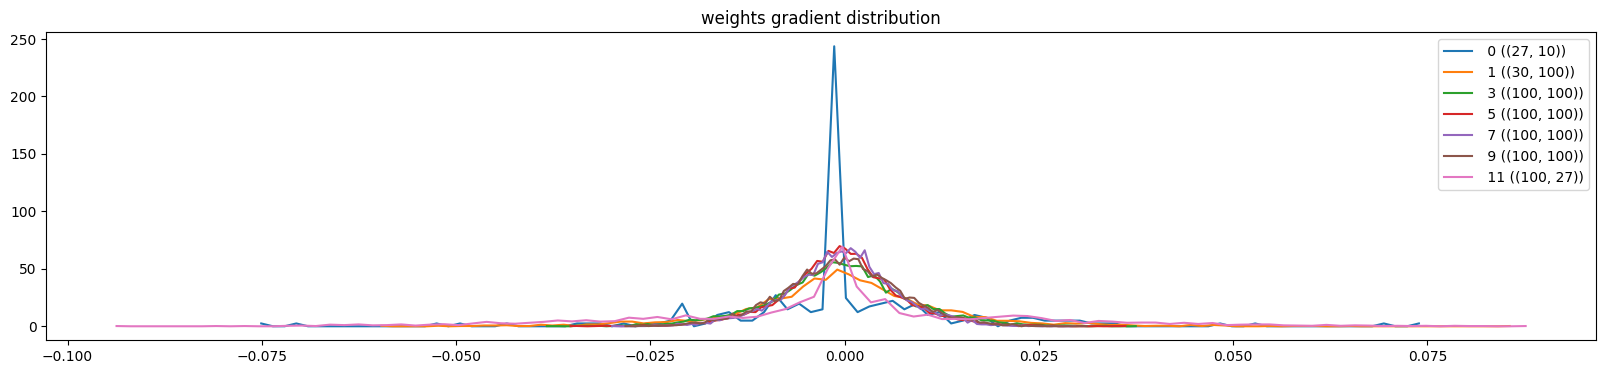

In [20]:
plt.figure(figsize = (20,4))
legends = []
for i, p in enumerate(parameters):
    t = p.grad
    if p.ndim == 2:
      print('weights %10s | mean %+f | std %e | grad: data ratio %e' % (tuple(p.shape), t.mean(), t.std(), t.std() / p.std()))
      hy, hx = torch.histogram(t, density = True)
      plt.plot(hx[:-1].detach(), hy.detach())
      legends.append(f' {i} ({tuple(p.shape)})')
plt.legend(legends);
plt.title('weights gradient distribution')

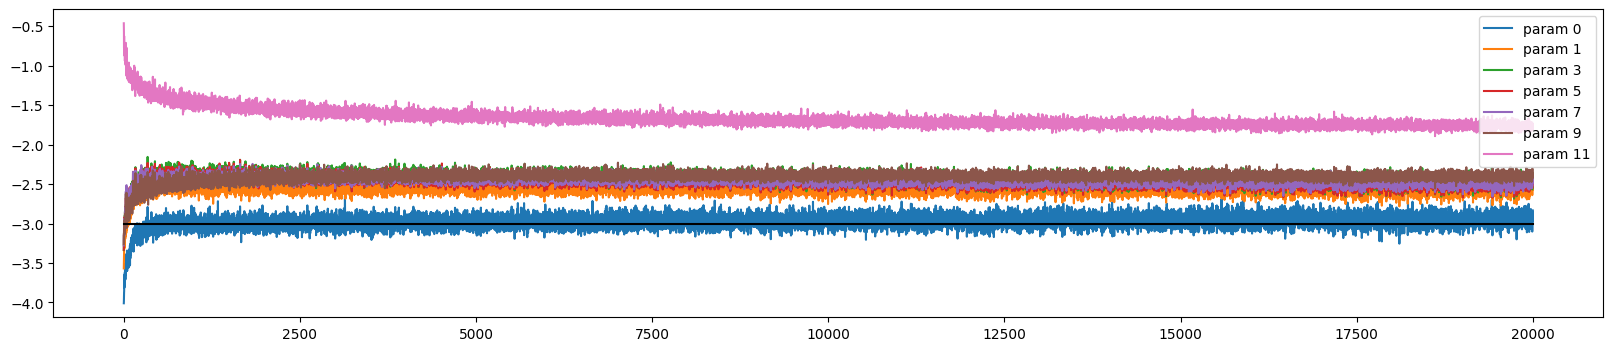

In [22]:
plt.figure(figsize =(20,4))
legends = []
for i, p in enumerate(parameters):
  if p.ndim == 2:
    plt.plot([ud[j][i] for j in range(len(ud))])
    legends.append('param %d' % i)
plt.plot([0, len(ud)], [-3, -3], 'k')
plt.legend(legends);
